# Import generic

In [1]:
#So first we need to cluster the players on height, weight and stats (Use PCA), 
#after that we would ML on the dataset where we have player and their cluster. 
#year they are in and VORP and or total win share.

In [19]:
# Importing required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## ML && PCA
# Standardize the data with StandardScaler().
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [53]:
nba_data = pd.read_csv('Resources/dataset_clean.csv')
#, index_col='Player'

In [62]:
# nba_data['Player'].unique()

In [61]:
# nba_data[nba_data['Player']=='Stephen Zimmerman']['VORP'].plot()

In [ ]:
# 0) Create a player id
# main: how do we define a player done (it's peak)
# 1) Is VORP is going across down (theory) ?
# 2) What is the definition of decrease?
# 3) Two things to control for: position and time
# 4) 

In [21]:
# nba_data[nba_data['Year']==2015]

In [60]:
nba_data.columns

Index(['Year', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS',
       'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'year_start', 'height', 'weight', 'Status'],
      dtype='object')

In [23]:
pd.set_option('max_columns', 500)

nba_data.head()

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,height,weight,Status
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,NaN,0.2,0.2,0.4,0.104,NaN,-1.2,0.7,-0.5,0.1,27,58,0.466,0,1,0.000,27,57,0.474,0.466,3,6,0.500,14,26,40,21,6,3,7,26,57,1998,6-6,223,6
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,NaN,7.4,2.3,9.7,0.151,NaN,2.1,-0.4,1.7,2.8,566,1183,0.478,21,60,0.350,545,1123,0.485,0.487,455,541,0.841,175,502,677,242,87,38,212,240,1608,1997,6-9,225,7
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,NaN,6.1,2.0,8.1,0.145,NaN,1.3,-1.0,0.3,1.6,501,1054,0.475,9,34,0.265,492,1020,0.482,0.480,373,429,0.869,189,450,639,174,68,37,184,222,1384,1997,6-9,225,8
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,NaN,3.9,1.5,5.4,0.139,NaN,1.4,-0.5,0.8,1.3,337,670,0.503,15,39,0.385,322,631,0.510,0.514,220,254,0.866,123,269,392,111,49,26,117,150,909,1997,6-9,225,9
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,NaN,4.0,2.2,6.2,0.152,NaN,0.4,0.4,0.9,1.4,332,632,0.525,5,22,0.227,327,610,0.536,0.529,218,278,0.784,106,251,357,149,48,42,108,227,887,1997,6-9,225,10


In [24]:
## Drop height since the format is 5-10 and not "cm" unit
del nba_data['height']

del nba_data['blanl']
del nba_data['blank2']
del nba_data['3P%']
del nba_data['FT%']

In [25]:
# Create a new DataFrame that holds only the cryptocurrencies names.
nba_label_df = pd.DataFrame(nba_data.Player)
nba_label_df.set_index("Player")
nba_label_df

,Player
0,Tariq Abdul-Wahad
1,Shareef Abdur-Rahim
2,Shareef Abdur-Rahim
3,Shareef Abdur-Rahim
4,Shareef Abdur-Rahim
...,...
6268,Troy Williams
6269,Kyle Wiltjer
6270,Stephen Zimmerman
6271,Paul Zipser


In [26]:
del nba_data['Player']   
# nba_data = nba_data.drop(columns="Player")

## Generic Information

In [28]:
nba_data.groupby('Year').count()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
2004,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
2005,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
2006,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418
2007,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416
2008,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409
2009,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
2010,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411
2011,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418


In [29]:
# nba_data.head(15)

In [30]:
# summarize the nba_data
nba_data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,2010.168181,26.614220,58.027579,1368.446517,13.204193,0.518046,0.224275,0.296625,5.653228,14.582544,10.114937,12.941527,1.582321,1.620979,13.908704,18.665407,1.509740,1.388682,2.898725,0.081558,-1.170333,-0.208624,-1.378734,0.689287,208.986131,461.611988,0.442726,38.424040,107.736490,170.562092,353.875498,0.467521,0.481122,103.189224,136.151762,63.051331,175.465328,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,2005.327754,221.479675,5.840427
std,4.311041,4.225402,20.839700,860.169059,4.656013,0.062482,0.202405,0.161223,4.027958,5.680427,4.491148,9.100296,0.654119,1.593786,4.569770,4.910037,2.149083,1.202735,3.021776,0.063926,2.764516,1.776342,3.276796,1.420190,168.598866,361.634063,0.067580,48.650569,127.987099,147.518044,295.905395,0.068365,0.063959,107.157123,134.562286,61.459045,140.726003,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,5.772833,27.041645,4.017287
min,2003.000000,18.000000,11.000000,31.000000,-9.100000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,-3.300000,-0.600000,-2.100000,-0.325000,-16.400000,-8.200000,-17.900000,-2.000000,1.000000,4.000000,0.091000,0.000000,0.000000,0.000000,1.000000,0.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1985.000000,135.000000,1.000000
25%,2006.000000,23.000000,43.000000,600.000000,10.300000,0.487000,0.013000,0.189000,2.200000,10.000000,6.300000,6.400000,1.100000,0.500000,10.800000,15.200000,0.000000,0.400000,0.500000,0.044000,-2.900000,-1.400000,-3.300000,-0.200000,70.000000,162.000000,0.404000,0.000000,3.000000,52.000000,116.000000,0.431000,0.448000,27.000000,38.000000,19.000000,67.000000,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,2001.000000,200.000000,2.000000
50%,2010.000000,26.000000,64.000000,1325.000000,13.000000,0.524000,0.209000,0.268000,4.400000,13.600000,9.200000,10.000000,1.500000,1.100000,13.300000,18.400000,0.800000,1.100000,2.000000,0.084000,-1.200000,-0.300000,-1.300000,0.200000,172.000000,383.000000,0.440000,16.000000,51.000000,131.000000,279.000000,0.469000,0.485000,69.000000,94.000000,42.000000,145.000000,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,2005.000000,220.000000,5.000000
75%,2014.000000,30.000000,76.000000,2066.000000,15.900000,0.556000,0.382000,0.371000,8.600000,18.400000,13.400000,17.300000,2.000000,2.200000,16.200000,21.800000,2.400000,2.000000,4.300000,0.121000,0.500000,0.900000,0.700000,1.200000,310.000000,679.000000,0.480000,64.000000,182.000000,249.000000,513.000000,0.506000,0.518000,143.000000,192.000000,89.000000,243.000000,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,2010.000000,240.000000,9.000000
max,2017.000000,42.000000,85.000000,3401.000000,31.700000,0.737000,0.941000,2.400000,27.200000,38.600000,27.000000,57.300000,5.900000,15.100000,57.100000,41.700000,14.800000,9.100000,20.300000,0.325000,12.400000,7.500000,15.600000,12.400000,978.000000,2173.000000,0.800000,402.000000,886.000000,798.000000,1655.000000,0.800000,0.800000,756.000000,916.000000,440.000000,894.000000,1226.000000,925.000000,217.000000,307.000

In [31]:
# nba_data.nunique()

In [32]:
# nba_data.dtypes

In [33]:
# nba_data.shape

In [34]:
# Print all Columns
# print(nba_data.columns.tolist())

In [35]:
# List NA
# nba_data.isna().sum()

In [36]:
nba_data.dropna()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
0,2003,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0.466,0,1,27,57,0.474,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,6
1,2003,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,0.478,21,60,545,1123,0.485,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,7
2,2004,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,0.475,9,34,492,1020,0.482,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,8
3,2005,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,0.503,15,39,322,631,0.510,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,9
4,2006,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,0.525,5,22,327,610,0.536,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2017,22,30,557,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73,167,0.437,18,62,55,105,0.524,0.491,21,32,15,54,69,25,27,10,33,60,185,2017,218,1
6269,2017,24,14,44,6.7,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-0.1,0.1,0.0,-0.039,-4.0,0.0,-4.0,0.0,4,14,0.286,4,13,0,1,0.000,0.429,1,2,4,6,10,2,3,1,5,4,13,2017,240,1
6270,2017,20,19,108,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10,31,0.323,0,0,10,31,0.323,0.323,3,5,11,24,35,4,2,5,3,17,23,2017,240,1
6271,2017,22,44,843,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88,221,0.398,33,99,55,122,0.451,0.473,31,40,15,110,125,36,15,16,40,78,240,2017,215,1


In [63]:
# nba_data.isna().sum()

## Principal Component Analysis
### https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [38]:
# df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [ ]:
nba_data[nba_data['year']==2016]['VORP'].plot(kinda)

In [51]:
nba_data.head()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,2P,2PA,2P%,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status
0,2003,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0.466,0,1,27,57,0.474,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,6
1,2003,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,0.478,21,60,545,1123,0.485,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,7
2,2004,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,0.475,9,34,492,1020,0.482,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,8
3,2005,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,0.503,15,39,322,631,0.510,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,9
4,2006,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,0.525,5,22,327,610,0.536,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,10


In [40]:
iris_scaled = StandardScaler().fit_transform(nba_data)
print(iris_scaled[0:5])

[[-1.66288214  0.3279903  -2.11284658 -1.35384937 -0.17273505 -0.76901737
  -1.02413819 -1.20107237  0.48335338 -0.10256107  0.15254842  0.27017459
  -0.12586035 -0.32690739 -0.7897534  -0.74657275 -0.60948998 -0.98839429
  -0.82697205  0.35109489 -0.01073215  0.51155514  0.26819008 -0.41496879
  -1.0794891  -1.11616743  0.3444179  -0.78985926 -0.83402936 -0.97326084
  -1.0033584   0.09478142 -0.23644875 -0.93504946 -0.96730028 -0.79817774
  -1.06218637 -1.02017107 -0.75475631 -1.09050803 -0.71300249 -1.16265226
  -1.36093778 -1.08728458 -1.26945272  0.05622611  0.03972469]
 [-1.66288214 -0.1453752   1.10242724  1.99808452  1.4382135   0.76753748
  -0.85614517  0.9948155   0.25989729  0.56645605  0.53110094  0.19324788
  -0.12586035 -0.45240478 -0.19886698  1.12728976  2.74104319  0.75776542
   2.25093408  1.08637635  1.18306222 -0.10774447  0.93963104  1.48633723
   2.11770302  1.99496008  0.52199843 -0.35817522 -0.37300865  2.53845392
   2.59943153  0.25569577  0.09191338  3.28339183

In [65]:
# Using PCA to reduce dimension to three principal components.
n_comp = 10

# Initialize PCA model
pca = PCA(n_components=n_comp)

# Get tree principal components for the iris data.
nba_data_pca = pca.fit_transform(iris_scaled)

In [66]:
# Create a DataFrame with the three principal components.
# Transform PCA to DF
pcs_df = pd.DataFrame(data=nba_data_pca, columns=[f'PC {x}' for x in range(n_comp)], index=nba_label_df.index)
pcs_df.head(15)

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-4.241400,0.857309,-0.833945,1.607268,1.053126,-1.196616,0.563544,-1.714278,-1.473423,0.491266
1,9.222855,0.514265,2.730622,-0.031806,0.604638,-2.645827,-0.633796,-0.808666,0.016264,-0.759442
2,7.342653,1.167219,2.527542,0.116652,0.030687,-2.776286,-0.721002,-0.453002,-0.543464,-0.985065
3,3.528702,1.185185,0.052877,0.934884,0.591828,-2.515492,-0.357716,-0.610457,-0.610400,-0.434640
4,4.046283,1.482439,-0.137073,1.410095,0.594224,-1.895269,-1.194883,-0.217598,-0.513362,0.149172
5,2.097778,1.383158,1.986345,1.307472,-0.734651,-1.263718,-1.736870,0.664175,-0.750793,-0.492745
6,-2.277484,-1.954021,2.349672,-0.754834,-0.558485,-1.695404,-1.562055,-1.235796,-0.653761,0.211066
7,0.717573,1.938539,4.214201,-0.971775,-2.156132,0.160943,-2.479645,-0.308623,-1.207023,1.025375
8,-3.838303,1.877234,1.523368,-0.196699,-0.600462,-0.675210,0.020260,-1.414187,-0.494547,1.156434
9,-3.066278,2.059089,-0.696572,0.038271,-0.314560,-1.603197,0.273561,-1.451126,-0.980882,1.133791


In [89]:
## two stratifications: 
# (1) player position
# (2) year (remove year as a variable)

# Initialize the K-Means model.
model = KMeans(n_clusters=10, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

/home/calestini/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='VORP'>

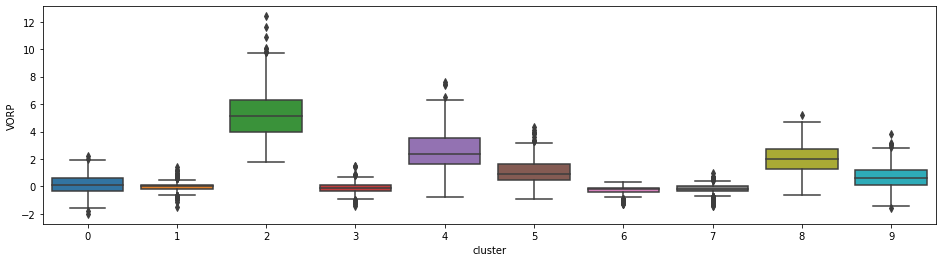

In [90]:
import seaborn as sns

df = pd.DataFrame(predictions, columns=['cluster'])
cluster_vorp = df.join(nba_data)

plt.figure(figsize=(16,4))
sns.boxplot(cluster_vorp['cluster'], cluster_vorp['VORP'])

In [93]:
cluster_vorp.groupby('cluster').describe()

Year                                                                 \
         count         mean       std     min     25%     50%     75%     max   
cluster                                                                         
0        761.0  2009.420499  4.306886  2003.0  2006.0  2009.0  2013.0  2017.0   
1        869.0  2009.985040  4.210039  2003.0  2006.0  2010.0  2014.0  2017.0   
2        169.0  2010.213018  4.665177  2003.0  2006.0  2010.0  2014.0  2017.0   
3        557.0  2009.278276  4.290668  2003.0  2005.0  2009.0  2013.0  2017.0   
4        429.0  2010.039627  4.218430  2003.0  2006.0  2010.0  2014.0  2017.0   
5        691.0  2012.076700  3.910398  2003.0  2009.0  2013.0  2016.0  2017.0   
6        528.0  2009.051136  4.192163  2003.0  2005.0  2009.0  2013.0  2017.0   
7        841.0  2011.652794  4.084905  2003.0  2008.0  2012.0  2015.0  2017.0   
8        632.0  2009.392405  4.090630  2003.0  2006.0  2009.0  2013.0  2017.0   
9        796.0  2009.896985  4.316934  2003.0  2006.0  2010.0  2014.0  2017.0   

           Age                                                         G  \
         count       mean       std   min   25%   50%   75%   max  count   
cluster                                                                    
0        761.0  26.214192  3.738858  19.0  23.0  26.0  29.0  38.0  761.0   
1        869.0  26.058688  3.875363  18.0  23.0  25.0  29.0  38.0  869.0   
2        169.0  26.443787  3.045015  20.0  24.0  26.0  28.0  35.0  169.0   
3        557.0  32.585278  2.967207  25.0  30.0  32.0  34.0  42.0  557.0   
4        429.0  26.151515  3.713813  19.0  23.0  26.0  29.0  38.0  429.0   
5        691.0  27.452967  3.930413  19.0  24.0  27.0  30.0  40.0  691.0   
6        528.0  25.774621  4.281415  18.0  23.0  24.0  29.0  39.0  528.0   
7        841.0  23.960761  2.590207  18.0  22.0  24.0  25.0  32.0  841.0   
8        632.0  26.476266  3.820382  19.0  24.0  26.0  29.0  38.0  632.0   
9        796.0  26.452261  4.142309  19.0  23.0  26.0  29.0  39.0  796.0   

                                                                MP  \
              mean        std   min   25%   50%   75%   max  count   
cluster                                                              
0        68.366623  11.563140  26.0  62.0  71.0  78.0  84.0  761.0   
1        41.535098  17.426547  11.0  27.0  42.0  55.0  82.0  869.0   
2        76.893491   5.431436  51.0  75.0  78.0  81.0  82.0  169.0   
3        45.574506  18.010596  11.0  31.0  47.0  60.0  82.0  557.0   
4        74.944056   7.363819  44.0  71.0  77.0  81.0  85.0  429.0   
5        71.672938   9.653721  27.0  66.0  75.0  79.0  82.0  691.0   
6        27.952652  13.744885  11.0  17.0  25.0  36.0  81.0  528.0   
7        45.439952  17.162640  11.0  32.0  46.0  59.0  82.0  841.0   
8        74.359177   8.354228  39.0  70.0  77.0  81.0  83.0  632.0   
9        70.175879  10.172684  25.0  64.0  72.0  79.0  82.0  796.0   

                                                                            \
                mean         std     min      25%     50%      75%     max   
cluster                                                                      
0        1698.650460  381.679042   732.0  1410.00  1669.0  1975.00  2906.0   
1         562.185270  318.711058    39.0   298.00   544.0   797.00  1844.0   
2        2842.260355  300.920102  1921.0  2686.00  2863.0  3038.00  3401.0   
3         742.466786  390.291647    73.0   406.00   718.0  1021.00  1948.0   
4        2459.156177  333.456938  1530.0  2222.00  2455.0  2684.00  3263.0   
5        1830.863965  431.880467   678.0  1506.50  1813.0  2134.00  2988.0   
6         276.102273  209.685897    31.0   122.75   214.0   370.50  1320.0   
7         673.800238  356.616939    33.0   387.00   659.0   929.00  1817.0   
8        2531.145570  373.408281  1375.0  2278.00  2553.0  2799.25  3351.0   
9        1604.170854  391.338495   739.0  1314.00  1576.5  1892.50  2594.0   

           PER                           

In [95]:
cluster_vorp[cluster_vorp['cluster']==2]['Player'].unique()

array(['Ray Allen', 'Gilbert Arenas', 'Chauncey Billups', 'Kobe Bryant',
       'Vince Carter', 'Sam Cassell', 'Baron Davis', 'Steve Francis',
       'Kevin Garnett', 'Manu Ginobili', 'Richard Jefferson',
       'Jason Kidd', 'Stephon Marbury', 'Shawn Marion', 'Jamal Mashburn',
       'Tracy McGrady', 'Steve Nash', 'Dirk Nowitzki', 'Paul Pierce',
       'Michael Redd', 'Peja Stojakovic', "Amar'e Stoudemire",
       'Hedo Turkoglu', 'Carmelo Anthony', 'LeBron James', 'Dwyane Wade',
       'Andre Iguodala', 'Kevin Martin', 'Chris Paul', 'Deron Williams',
       'Kyle Lowry', 'Brandon Roy', 'Mike Conley', 'Kevin Durant',
       'Goran Dragic', 'Kevin Love', 'Derrick Rose', 'Russell Westbrook',
       'Stephen Curry', 'DeMar DeRozan', 'James Harden',
       'DeMarcus Cousins', 'Paul George', 'Blake Griffin',
       'Gordon Hayward', 'John Wall', 'Jimmy Butler', 'Kyrie Irving',
       'Kawhi Leonard', 'Isaiah Thomas', 'Kemba Walker', 'Damian Lillard',
       'Giannis Antetokounmpo'], dtype=

In [91]:
cluster_vorp[cluster_vorp['Player']=='Shareef Abdur-Rahim']

,cluster,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,height,weight,Status
1,4,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,NaN,7.4,2.3,9.7,0.151,NaN,2.1,-0.4,1.7,2.8,566,1183,0.478,21,60,0.350,545,1123,0.485,0.487,455,541,0.841,175,502,677,242,87,38,212,240,1608,1997,6-9,225,7
2,4,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,NaN,6.1,2.0,8.1,0.145,NaN,1.3,-1.0,0.3,1.6,501,1054,0.475,9,34,0.265,492,1020,0.482,0.480,373,429,0.869,189,450,639,174,68,37,184,222,1384,1997,6-9,225,8
3,9,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,NaN,3.9,1.5,5.4,0.139,NaN,1.4,-0.5,0.8,1.3,337,670,0.503,15,39,0.385,322,631,0.510,0.514,220,254,0.866,123,269,392,111,49,26,117,150,909,1997,6-9,225,9
4,9,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,NaN,4.0,2.2,6.2,0.152,NaN,0.4,0.4,0.9,1.4,332,632,0.525,5,22,0.227,327,610,0.536,0.529,218,278,0.784,106,251,357,149,48,42,108,227,887,1997,6-9,225,10
5,9,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,NaN,1.1,1.7,2.8,0.067,NaN,-2.1,0.0,-2.1,-0.1,310,654,0.474,3,20,0.150,307,634,0.484,0.476,170,234,0.726,122,276,398,109,53,40,116,243,793,1997,6-9,225,11


### Exploratory Visualization

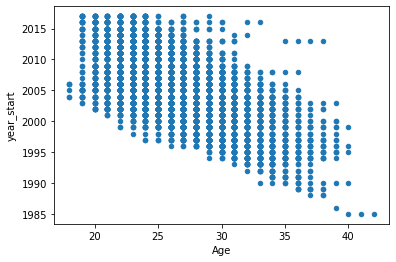

In [22]:
nba_data.plot(x ='Age', y='year_start', kind = 'scatter')	
plt.show()

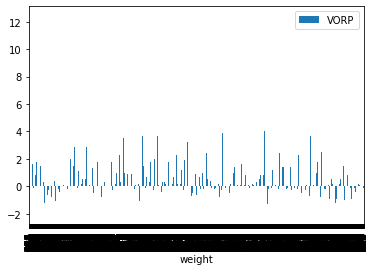

In [23]:
nba_data.plot(x ='weight', y='VORP', kind = 'bar')
plt.show()

## Resources

In [24]:
### PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
# https://towardsdatascience.com/redefining-nba-player-classifications-using-clustering-36a348fa54a8